In [63]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.plotly as py
from plotly import tools
import plotly.tools as tls
import doctest

In [70]:
def read_file(csv_file):
    """The function reads a csv file and returns a dataframe. 
    :param csv_file: filename
    :return : dataframe
    >>>f=read_file("Managers.csv")
    >>>f.head(1)
    playerID yearID teamID lgID inseason G W L rank plyrMgr
     0   wrighha01 1871  BS1   NaN   1      31 20 10 3.0  Y

    """
    data= pd.read_csv(csv_file)
    return data

In [71]:
comp_data=read_file("complaint_data.csv")
county_data_2017=read_file("acs2017_county_data.csv")
county_data_2015=read_file("acs2015_county_data.csv")
state_forms=read_file("uszips.csv")

/Users/priyanshumadan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning:

Columns (5,11,16) have mixed types. Specify dtype option on import or set low_memory=False.



In [72]:
def merge_dataframes(df1,df2,colname,join):
    """This function merges two datframes on a specified column name on the basis of the type of join specified.It returns a datframe.
    :param df1: dataframe1
    :param df2: dataframe2
    :param colname : the column name used to join the dataframes
    :param join : the type of join desired
    :return :Merged dataframe
    >>>df1=pd.dataframe([[37,'Anna'],[59,'Amber'],[60,'BOB']],columns=["ID","name"])
    >>>df2=pd.dataframe([[37,'40'],[60,'50']],columns=["ID","age"])
    >>>merge_dataframes(df1,df2,"ID","inner")
       ID  name age
    0  37  Anna  40
    1  60  BOB   50
    >>>merge_dataframes(df1,df2,"ID","left")
       ID  name age
    0  37  Anna  40
    1  59  Amber NaN
    2  60  BOB   50

    """
    df3= pd.merge(df1,df2,on=colname,how=join)
    return df3

In [5]:
def select_column(df,col_list):
    """The function reads a csv file and returns a dataframe. 
    :param df: dataframe
    :param col_list: The column indices that you want to select from a dataframe.
    :return sliced_df : dataframe that is sliced according to the needs.
    >>>df=pd.DataFrame([['Ada County',10,30,'a'],['Abbeville County',20,90,'b'],['Adair County',30,70,'c']],columns=["County","metric_1","metric_2","metric_3"])
    >>>col_list=[0,3]
    >>>select_column(df,col_list)
      County              metric_3
    0  Ada County           a
    1  Abbeville County     b
    2  Adair County         c 
    
    """
    
    sliced_df=df.iloc[:,col_list]
    return sliced_df

In [88]:
def get_population(df,grpby,column):
    """
    This function gives the population of each state and returns it as a dataframe.
    :param df : dataframe
    :param grpby : column name by which grouping has to be done
    :param column: column name to be aggregated
    >>df=pd.DataFrame([['Ada County',10,30,'a'],['Abbeville County',20,90,'b'],['Adair County',30,70,'c'],['Ada County',60,70,'c'],['Adair County',90,70,'c']],columns=["County","metric_1","metric_2","metric_3"])
    >>grpby='County'
    >>column='metric_1'
    >>p=get_population(df,grpby,column)
    >>p.head(3)
      County     Names
    0 Ada         70
    1 Abbeville   20
    2 Adair       120
    """
    
    pop=df.groupby(grpby)[column].sum().reset_index()
    pop.rename(columns={grpby:'Names'},inplace=True)
    return pop

In [ ]:
def get_income(df,grpby,column):
    """
    This function gives the income of each state and returns it as a dataframe.
    :param df : dataframe
    :param grpby : column name by which grouping has to be done
    :param column: column name to be aggregated
    >>df=pd.DataFrame([['Ada County',10,30,'a'],['Abbeville County',20,90,'b'],['Adair County',30,70,'c'],['Ada County',60,70,'c'],['Adair County',90,70,'c']],columns=["County","metric_1","metric_2","metric_3"])
    >>grpby='County'
    >>column='metric_1'
    >>p=get_population(df,grpby,column)
    >>p.head(3)
      County     Names
    0 Ada         70
    1 Abbeville   20
    2 Adair       120
    """

    income=df.groupby(grpby)[column].median().reset_index()
    income.rename(columns={grpby:'Names'},inplace=True)
    return income

In [75]:
def get_loan_state(pop_df,income_df):
    """This function merges population and income dataframe to state dataframe based on state. It returns a datframe.
    :param pop_df: population_dataframe
    :param income_df: income_dataframe
    :return :Merged loan dataframe
    """
    loan_state=read_file("uszips.csv")
    loan_state=merge_dataframes(loan_state,pop_df,'Names',"left")
    loan_state=merge_dataframes(loan_state,income_df,'Names',"left")
    return loan_state

In [76]:
def get_issue_per_year(loan_issue,year):
    """
    This function takes loan_issue dataframe and extracts issues of a particular year. It returns a dataframe.
    :param loan_issue: dataframe
    :param year:The year for which you need the data
    :return loan_issue_year:filtered dataframe
    >>df1=pd.dataframe([[1937,'Anna'],[1937,'Amber'],[1960,'BOB']],columns=["Year","name"])
    >>l=get_issue_per_year(df1,37)
    >>l
        Year  name
    0   1937  Anna
    1   1937  Amber
    """
    loan_issue_year = loan_issue[loan_issue['Date received'].str.contains("/"+year+"$", regex=True)]
    return loan_issue_year

In [77]:
def get_loan_percent(loan_issue_df):
    """
    This function calculates the percentage of each loan in a particular year. It returns a dataframe.
    :param loan_issue_df: dataframe
    """
    loan_percent = round(pd.value_counts(loan_issue_df["Product"]) / len(loan_issue_df["Product"]) * 100,2)
    return loan_percent

In [78]:
def assign_stack_value_2015(loan_issue_2015):
    """
    This function takes count of loans for each state in 2015 and adds column to loan_sate_2015 dataframe.
    :param loan_issue_2015: dataframe
    :return loan_state_2015:revised dataframe
    """
    loans_state_wise_2015 = loan_issue_2015.groupby("State")
    i = 0
    for states in state_forms.Names:
        a = loans_state_wise_2015.get_group(states)
        b = pd.value_counts(a['Product'])
        loan_state_2015.loc[i,"Student_loan"] = b["Student loan"]
        loan_state_2015.loc[i,"Mortgage"] = b["Mortgage"]
        loan_state_2015.loc[i,"Consumer_loan"] = b["Consumer Loan"]
        i=i+1
    return loan_state_2015

In [79]:
def assign_stack_value_2017(loan_issue_2017):
    """
    This function takes count of loans for each state in 2017 and adds column to loan_sate_2017 dataframe.
    :param loan_issue_2017: dataframe
    :return loan_state_2017:revised dataframe
    """
    loans_state_wise_2017 = loan_issue_2017.groupby("State")
    i = 0
    for states in state_forms.Names:
        a = loans_state_wise_2017.get_group(states)
        b = pd.value_counts(a['Product'])
        loan_state_2017.loc[i,"Student_loan"] = b["Student loan"]
        loan_state_2017.loc[i,"Mortgage"] = b["Mortgage"]
        loan_state_2017.loc[i,"Consumer_loan"] = b["Consumer Loan"]
        loan_state_2017.loc[i,"personal_loan"] = b["Payday loan, title loan, or personal loan"]
        loan_state_2017.loc[i,"Vehicle_loan"] = b["Vehicle loan or lease"]
        loan_state_2017.loc[i,"credit_card"] = b["Credit card or prepaid card"]
        i=i+1
    return loan_state_2017

In [90]:
def vehicle_loan(df):
    """ The input dataframe is merged with the county data to transform the data to county level data. The merged dataframe is filtered
        to limit the data to only vehicle loans data. It is then grouped at the county level to find the number of vehicle loans for every county
        and then merged with data containing percent transit population. This merged dataframe is then returned.
         :param df: dataframe
         :return pop1_transit: merged dataframe that has county level data for percent transit population and vehicle loans.
         
    """
    county_data_new=select_column(county_data_2017,[1,2,3,24,25,26,27,28,29,30])
    data_new=select_column(df,[0,1,2,3,4,9,18])
    #data_new.head()
    data_transport=merge_dataframes(data_new,county_data_new,"State","inner")
    data_transport = data_transport[data_transport['Date received'].str.contains('/17$', regex=True)]
    data_transport_loan=data_transport[data_transport['Product'].str.contains('Vehicle')]
    transit_pop=data_transport_loan.groupby('County').agg({'Product':'count'}).reset_index()
    print(transit_pop.head())
    pop1_transit=merge_dataframes(transit_pop,county_data_new,"County","inner") 
    return pop1_transit

In [81]:
def vehicle_loan_companies():
    """ This function gives the distributions of companies that had the maximum number of complaints registered wrt vehicle loans.
         It takes no parameters as input and displays a bar graph with the required distribution.
    """
    vehicle_loan=comp_data[comp_data['Product'].str.contains('Vehicle',na=False)]
    companies=vehicle_loan.groupby('Company')['Product'].count().reset_index()
    companies_greaterloans=companies[companies['Product']>60]
    companies_greaterloans.plot(kind='bar',x='Company',y='Product',title='Companies with max number of vehicle loan complaints')
    return

In [82]:
def geographical_dist_loans(df1,loans):
    """ This function plots the geographical distribution of loans over the united states. A dataframe and a list of loans are passed
             as parameters. Choropleth is used to plot the map based on the region codes provided in the input dataframe.
             :param df: dataframe
             :param loans: The types of loans that are to be analysed

    """
    #Establishing an API 
    tools.set_credentials_file(username='Sarvagya396', api_key='n0T5we93E9J3WuQYYWSe')
   
    loan_issue = df1[df1.Product.isin(loans)]
    data=loan_issue.dropna(subset=['State','Product'])
    
    #Grouping the data by state
    data_state=data.groupby('State',as_index=False).first()
    data_state['Product_Code'] = data_state['Product'].astype('category').cat.codes
   
    #Defining the text to be displayed
    data_state['text']='Type of loan' + data_state['Product'] +'<br>' +'State' + data_state['State']
    
    data1=[dict(type='choropleth',autocolorscale=False,locations=data_state['State'],z=data_state['Product_Code'],locationmode='USA-states',text=data_state['text'],colorscale='Reds')]
    
    #defining the layout
    layout=dict(title='Loans by regions',geo=dict(scope='usa',projection=dict(type='albers usa'),showlakes=True,lakecolor='rgb(66,165,245)',),)
    
    #plotting the map
    fig=dict(data=data1,layout=layout)
    py.iplot(fig,filename='d4-choropleth-map')
    
    return
    
    

In [83]:
def response_time(issue_data):
    """The function takes in a dataframe (which is a subset of the orginal complaint dataset) and finds the top complaints registered
       with respect to cedit cards. It also displays the the number of complaints resolved on time and the number of unresolved complaints per company.
       :param issue_data: subset of original complaint data set
    """
    credit_issue = issue_data[issue_data.Product.isin(credit)]
    response_time_count=credit_issue.groupby('Company')['Timely response?'].value_counts().unstack().dropna()
    response_time_count1=response_time_count.sort_values('Yes', ascending=False)[:]
    print(pd.value_counts(credit_issue['Issue']))
    print(response_time_count1)



percentage of loans in 2015
Mortgage         77.37
Consumer Loan    14.41
Student loan      8.22
Name: Product, dtype: float64


percentage of loans in 2017
Mortgage                                     41.68
Student loan                                 23.41
Credit card or prepaid card                  21.00
Vehicle loan or lease                         5.03
Consumer Loan                                 4.85
Payday loan, title loan, or personal loan     4.03
Name: Product, dtype: float64


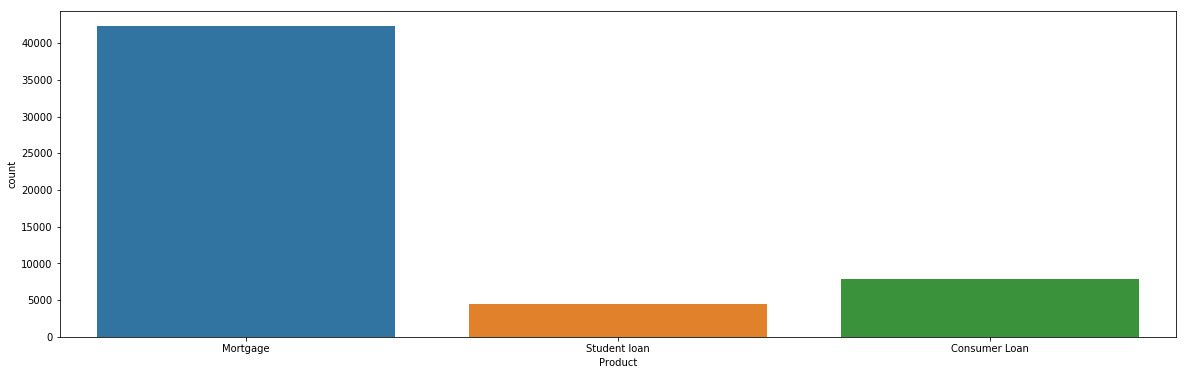

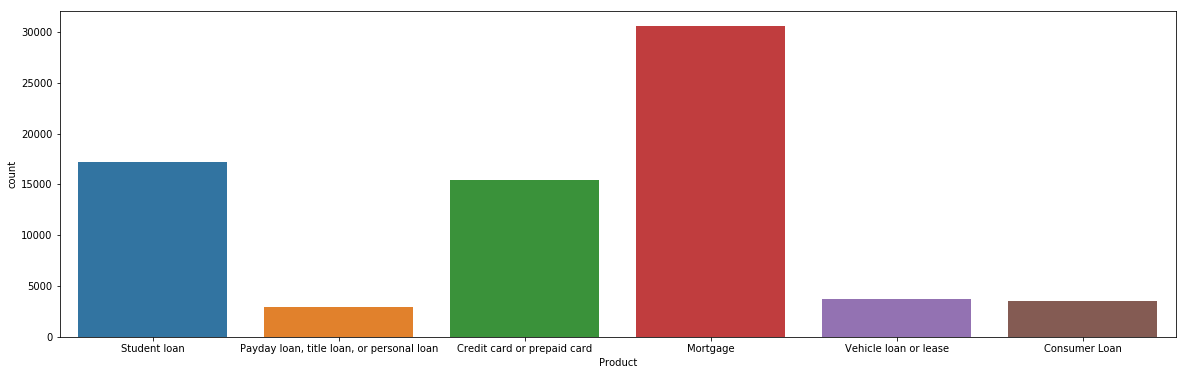



CREDIT_CARD VS INCOME


Distribution of Loan in 2015 for each state


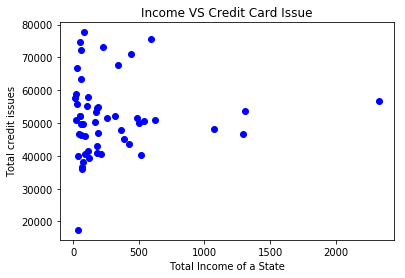

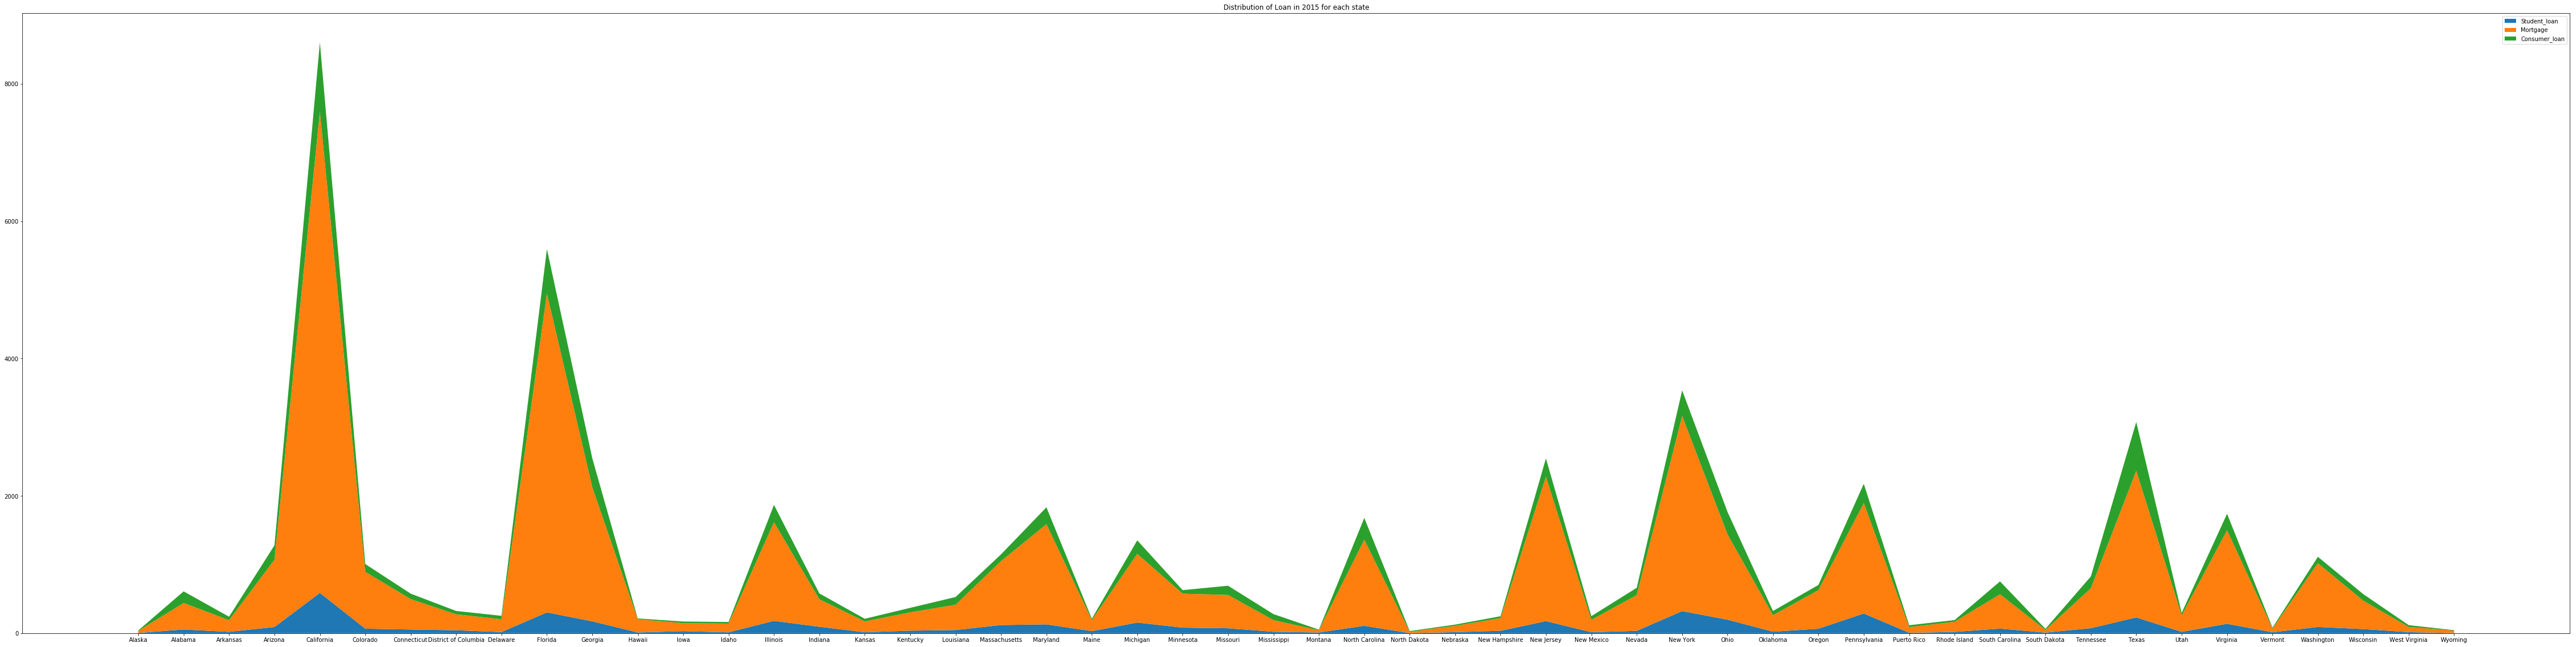



Distribution of Loan in 2017 for each state


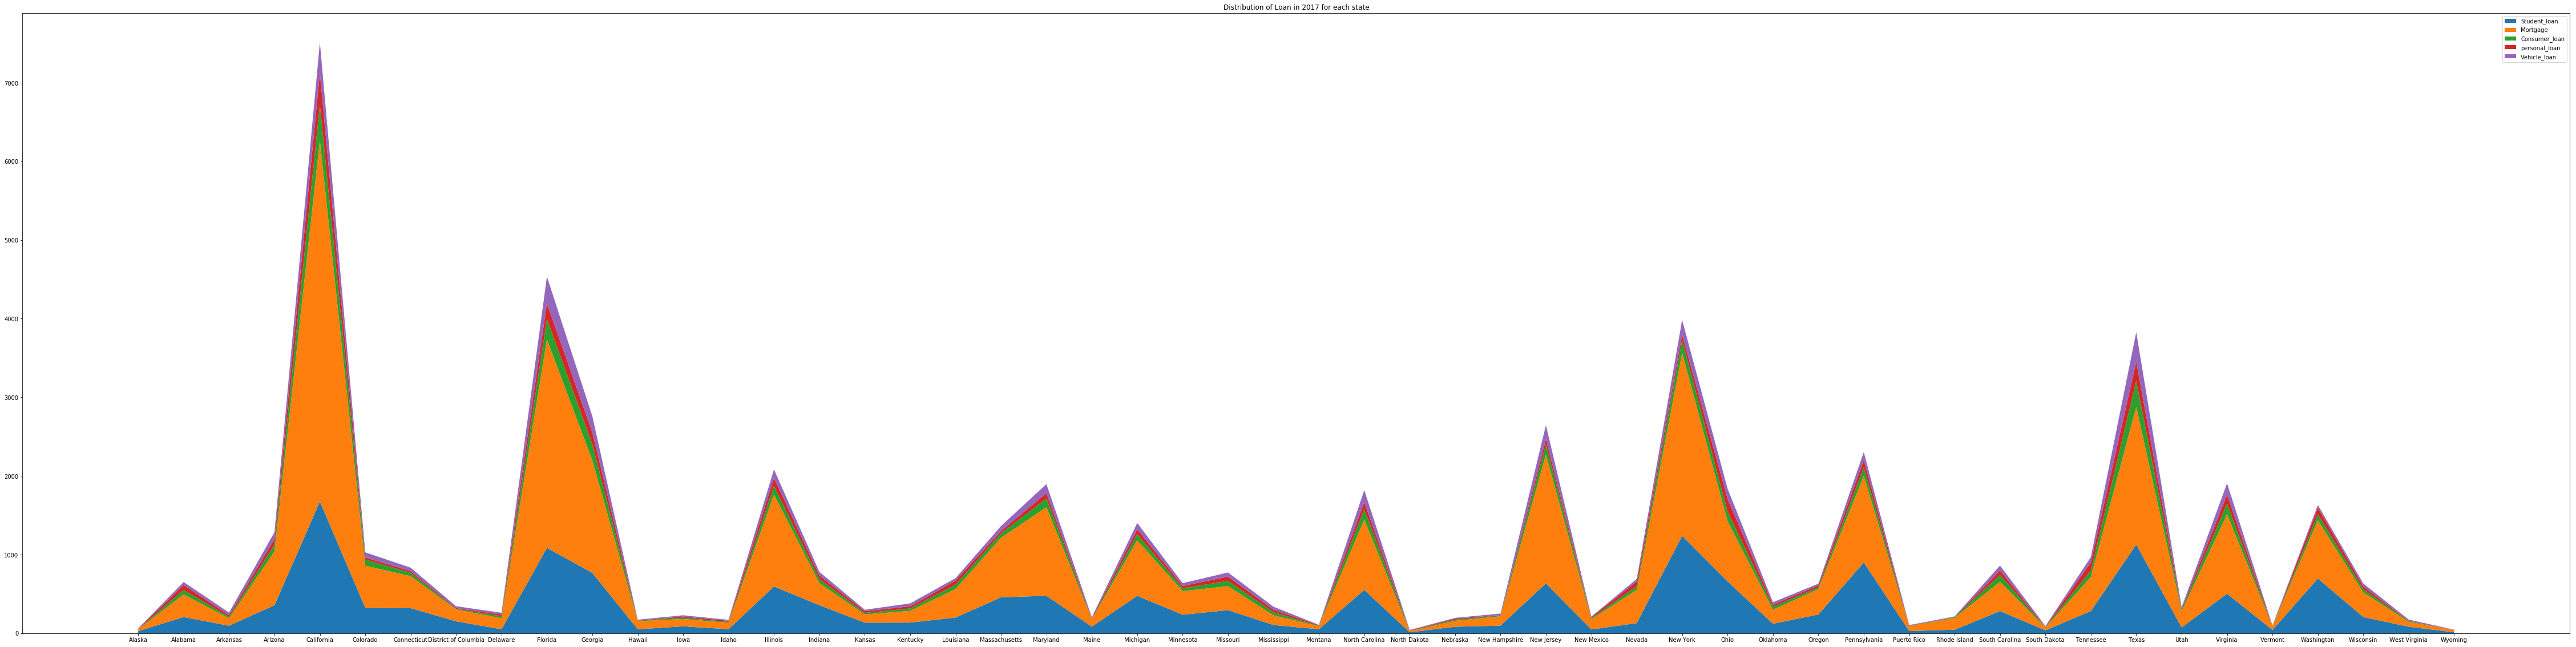



vehicle loan VS transit population
             County  Product
0  Abbeville County       62
1     Acadia Parish       30
2   Accomack County      146
3        Ada County       11
4      Adair County      139


vehicle loan complaint count


distribution of loans across USA


/Users/priyanshumadan/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead





Response time of companies
Problem with a purchase shown on your statement                                     10777
Fees or interest                                                                     5988
Other features, terms, or problems                                                   5951
Getting a credit card                                                                4301
Problem when making payments                                                         4268
Closing your account                                                                 3437
Advertising and marketing, including promotional offers                              2869
Trouble using your card                                                              1701
Incorrect information on your report                                                 1625
Struggling to pay your bill                                                          1076
Problem with a purchase or transfer                                    

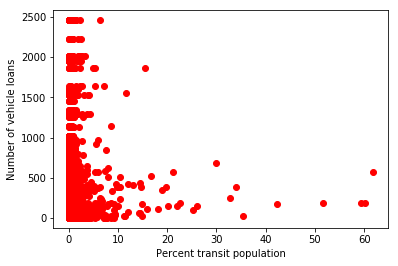

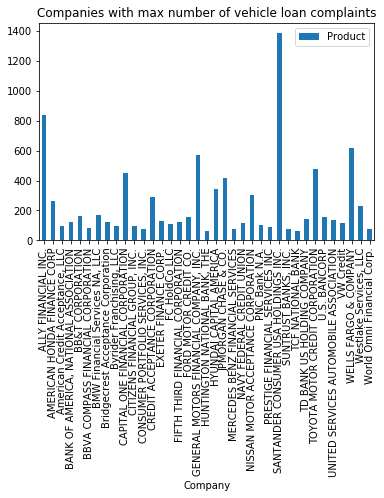

In [92]:
if __name__ == '__main__':
    data_13=merge_dataframes(comp_data,state_forms,'State',"left")
    data_13.rename(columns={'Names':'State','State':'State_initials'},inplace=True)
    issue_data=data_13.iloc[:,[0,1,2,3,4,18,7,15]]
    loans = ['Mortgage','Student loan','Consumer Loan','Vehicle loan or lease',
         'Payday loan, title loan, or personal loan','Credit card or prepaid card']
    credit = ['Credit card or prepaid card']
    loan_issue = issue_data[issue_data.Product.isin(loans)]
    
    ############### REQUIRED DATAFRAMES ####################
    tot_pop_2015 = get_population(county_data_2015,"State","TotalPop")
    tot_pop_2017 = get_population(county_data_2017,"State","TotalPop")
    income_2015 = get_income(county_data_2015,"State","Income")
    income_2017 = get_income(county_data_2017,"State","Income")
    loan_state_2015 = get_loan_state(tot_pop_2015,income_2015)
    loan_state_2017 = get_loan_state(tot_pop_2017,income_2017)
    loan_issue_2015 = get_issue_per_year(loan_issue,"15")
    loan_issue_2017 = get_issue_per_year(loan_issue,"17")
    ########################################################
    
    ################# LOAN PERCENTAGE #####################
    loan_percent_2015 = get_loan_percent(loan_issue_2015)
    loan_percent_2017 = get_loan_percent(loan_issue_2017)
    print("\n\npercentage of loans in 2015")
    print(loan_percent_2015)
    print("\n\npercentage of loans in 2017")
    print(loan_percent_2017)
    #####################################################
    
    ################ LOAN COUNT PLOT ####################
    #2015
    plt.figure(figsize=(20,6))
    sns.countplot(loan_issue_2015['Product'])
    plt.show()
    
    #2017
    plt.figure(figsize=(20,6))
    sns.countplot(loan_issue_2017['Product'])
    plt.show()
    ######################################################
    
    
    #######assigning of values for stackplot############
    stack_2015 = assign_stack_value_2015(loan_issue_2015)
    stack_2017 = assign_stack_value_2017(loan_issue_2017)
    
    #2015
    State_names_15=stack_2015.Names
    stu_loan_15=stack_2015.Student_loan
    mort_15=stack_2015.Mortgage
    consu_15=stack_2015.Consumer_loan
    
    #2017
    State_names=stack_2017.Names
    stu_loan=stack_2017.Student_loan
    mort=stack_2017.Mortgage
    consu=stack_2017.Consumer_loan
    perso=stack_2017.personal_loan
    vehi=stack_2017.Vehicle_loan
    ######################################################
    
    ################ CREDIT_CARD VS INCOME PLOT ##########
    print("\n\nCREDIT_CARD VS INCOME")
    Y= stack_2017['Income']
    X= stack_2017['credit_card']
    plt.scatter(X,Y,c='blue')
    plt.xlabel("Total Income of a State")
    plt.ylabel("Total credit issues")
    plt.title("Income VS Credit Card Issue")
    ######################################################
    
    ############## STACK PLOT #############################
    print("\n\nDistribution of Loan in 2015 for each state")
    labels = ["Student_loan", "Mortgage", "Consumer_loan","personal_loan","Vehicle_loan","credit_card"]
    plt.figure(figsize=(80,20))
    plt.stackplot(State_names_15,stu_loan_15,mort_15,consu_15)
    plt.title("Distribution of Loan in 2015 for each state")
    plt.legend(labels)
    plt.show()
        
    print("\n\nDistribution of Loan in 2017 for each state")
    plt.figure(figsize=(80,20))
    plt.stackplot(State_names,stu_loan,mort,consu,perso,vehi)
    plt.title("Distribution of Loan in 2017 for each state")
    plt.legend(labels)
    plt.show()
    #########################################################
    
    ############## VEHICLE LOAN PLOT #########################
    print("\n\nvehicle loan VS transit population")
    pop1_transit = vehicle_loan(data_13)
    Y=pop1_transit['Product'] 
    X=pop1_transit['Transit']
    plt.scatter(X,Y,c='red')
    plt.xlabel("Percent transit population")
    plt.ylabel("Number of vehicle loans")
    #########################################################
    print("\n\nvehicle loan complaint count")
    vehicle_loan_companies()
    
    print("\n\ndistribution of loans across USA")
    geographical_dist_loans(comp_data,loans) #PLOTS MAP OF USA
    
    print("\n\nResponse time of companies")
    response_time(issue_data) #DISPLAYS DATA OF RESPONSE TIME OF COMPANIES
